In [1]:
from gensim.models import word2vec
import random
import numpy as np

In [2]:
cbow_model = word2vec.Word2Vec.load_word2vec_format('f:/Data/badchats_cbow.bin', binary=True)  # C binary format

In [3]:
print cbow_model.most_similar('crap')

[(u'much,', 0.7804660201072693), (u'Oh,', 0.7754707336425781), (u'oh', 0.7662674188613892), (u'easy', 0.7654691338539124), (u'haha', 0.7650330662727356), (u'realize', 0.7560509443283081), (u'idiot', 0.7560474872589111), (u'Oh', 0.7511488199234009), (u'working?', 0.7496913075447083), (u'thats', 0.7442521452903748)]


In [4]:
print cbow_model.most_similar('unacceptable')

[(u'hours', 0.8138840198516846), (u'awful', 0.8089763522148132), (u'nobody', 0.803213357925415), (u'spent', 0.783123254776001), (u'ridiculous', 0.7794946432113647), (u'escalate', 0.7778428792953491), (u'guy', 0.7763382196426392), (u'escalating', 0.7751728296279907), (u'raised', 0.7723070383071899), (u'ive', 0.7712386846542358)]


In [5]:
print cbow_model.most_similar('hello')

[(u'hi', 0.799907922744751), (u'HI', 0.790432333946228), (u'yo', 0.746692955493927), (u'Good', 0.7465149760246277), (u'Hello', 0.743205189704895), (u'Hi', 0.7428991794586182), (u'Christopher', 0.7319446206092834), (u'Nicole', 0.7301594018936157), (u'Hey', 0.7276318073272705), (u'Ref:', 0.7221113443374634)]


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

(-0.80572781562805174, 0.67305395603179929)

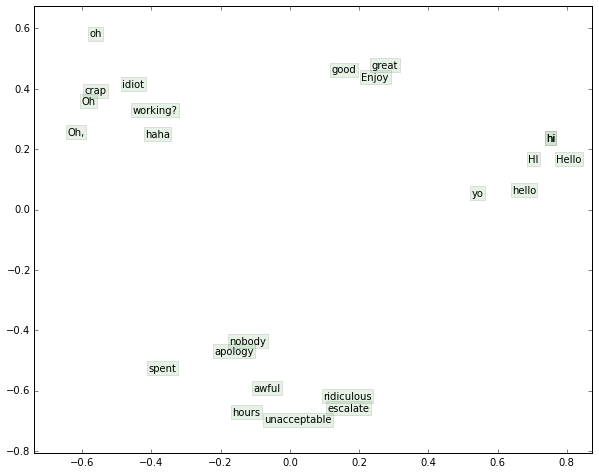

In [7]:
visualizeWords = ['Oh','oh','Oh,','haha','crap','hi','working?','hours','awful','spent','ridiculous', 'HI','yo','Hello','hi','apology', 'good', 'Enjoy', 'nobody', 'idiot', 'escalate', 'hello','great','unacceptable']
visualizeList = []
for word in visualizeWords:
    row = cbow_model[word]
    visualizeList.append(row)

visualizeVecs = np.vstack(visualizeList)

temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeWords) * temp.T.dot(temp)
U,S,V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2]) 

for i in xrange(len(visualizeWords)):
    plt.text(coord[i,0], coord[i,1], visualizeWords[i], bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(coord[:,0]) - 0.1, np.max(coord[:,0]) + 0.1))
plt.ylim((np.min(coord[:,1]) - 0.1, np.max(coord[:,1]) + 0.1))